# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

For more info, please visit https://youtu.be/QIUxPv5PJOY

**NOTE** <br> 
*epochs* should be medium (big enough to fit the data well, but also small enough to not overfit) <br>
*batch* should be small (minimize loss and increase accuracy), but should not be too small since the program should run quickly as well.

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
# Get the stock quote
df = web.DataReader('AMZN', data_source='yahoo', start='2010-01-01', end='2020-08-20')

# NOTE: data_source has to be 'yahoo', google doesn't work.
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
2010-01-08,133.679993,129.029999,130.559998,133.520004,9830500,133.520004
...,...,...,...,...,...,...
2020-07-27,3098.000000,3015.770020,3062.000000,3055.209961,4170500,3055.209961
2020-07-28,3077.090088,2995.760010,3054.270020,3000.330078,3126700,3000.330078
2020-07-29,3039.159912,2996.770020,3030.989990,3033.530029,2974100,3033.530029


In [ ]:
# Get the number of rows and columns in the data set
df.shape

(2663, 6)

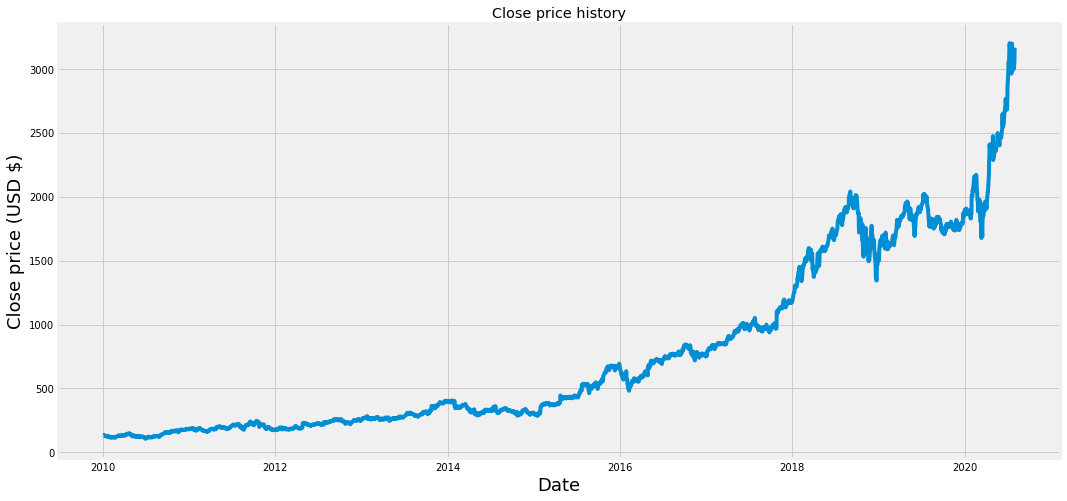

In [ ]:
# Visualize the closing price history
plt.figure(figsize =(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price (USD $)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2131

In [ ]:
# Scale the data to range 0-1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00818078],
       [0.00843634],
       [0.00764705],
       ...,
       [0.94615045],
       [0.95208624],
       [0.9885747 ]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

  if i <= 61:
    print("x_train =", x_train, end='\n\n')
    print("y_train =", y_train, end='\n----------------------------\n')

x_train = [array([0.00818078, 0.00843634, 0.00764705, 0.00691922, 0.00805787,
       0.0070195 , 0.006062  , 0.00663132, 0.006062  , 0.00599407,
       0.0061461 , 0.00555414, 0.00582586, 0.004147  , 0.0037847 ,
       0.00351622, 0.00457399, 0.00563501, 0.00543445, 0.0033189 ,
       0.00307629, 0.00339329, 0.0023711 , 0.00284015, 0.002659  ,
       0.00304717, 0.00283044, 0.00371354, 0.00357444, 0.00288543,
       0.00249079, 0.00306335, 0.0028822 , 0.0030407 , 0.00279162,
       0.00359385, 0.00310216, 0.00316686, 0.00515302, 0.00547327,
       0.00558972, 0.0064437 , 0.00656663, 0.0069548 , 0.00653751,
       0.00708419, 0.00807727, 0.00750795, 0.00728475, 0.00749824,
       0.00735268, 0.00781202, 0.00703244, 0.00707125, 0.00667984,
       0.0062852 , 0.00844927, 0.00855602, 0.00857543, 0.00904771])]

y_train = [0.008785693059585403]
----------------------------
x_train = [array([0.00818078, 0.00843634, 0.00764705, 0.00691922, 0.00805787,
       0.0070195 , 0.006062  , 0.00663132,

In [ ]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
# LSTM expects 3D: no. of samples, no. of timesteps, no. of features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2071, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size = 8, epochs = 10)

Epoch 1/10
259/259 [==============================] - 9s 36ms/step - loss: 6.9996e-04
Epoch 2/10
259/259 [==============================] - 9s 35ms/step - loss: 1.0123e-04
Epoch 3/10
259/259 [==============================] - 9s 36ms/step - loss: 7.4758e-05
Epoch 4/10
259/259 [==============================] - 9s 36ms/step - loss: 7.0389e-05
Epoch 5/10
259/259 [==============================] - 10s 37ms/step - loss: 8.7291e-05
Epoch 6/10
259/259 [==============================] - 9s 36ms/step - loss: 6.7875e-05
Epoch 7/10
259/259 [==============================] - 9s 36ms/step - loss: 6.4723e-05
Epoch 8/10
259/259 [==============================] - 9s 35ms/step - loss: 4.8563e-05
Epoch 9/10
259/259 [==============================] - 9s 35ms/step - loss: 5.2539e-05
Epoch 10/10
259/259 [==============================] - 9s 36ms/step - loss: 4.3322e-05


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 2131 to 2663
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# Convert the data to a numpy array
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

51.21964327016271

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


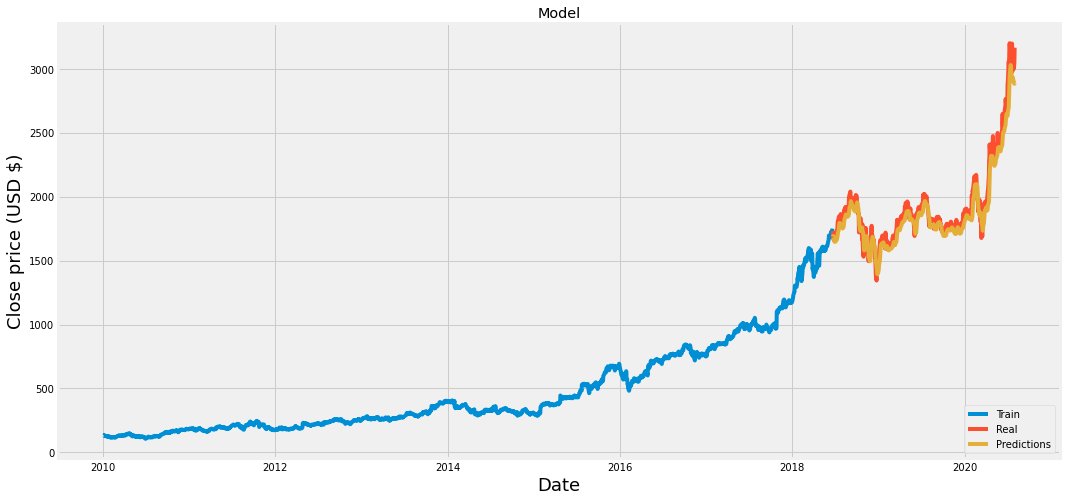

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close price (USD $)", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Real', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-06-21,1730.219971,1687.605957
2018-06-22,1715.670044,1691.646484
2018-06-25,1663.150024,1690.521729
2018-06-26,1691.089966,1677.700317
2018-06-27,1660.510010,1666.354736
...,...,...
2020-07-27,3055.209961,2903.817627
2020-07-28,3000.330078,2896.715332
2020-07-29,3033.530029,2886.072266


In [ ]:
# Get the quote
apple_quote = web.DataReader('AMZN', data_source='yahoo', start='2010-01-01', end='2020-08-28')

# Get the last 60 day closing price values
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values

# Scale the data to range 0-1
last_60_days_scaled = scaler.transform(last_60_days)

# Convert the test data to a numpy array
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted value for AAPL on 2020-08-28
pred_price = model.predict(X_test)
pred_price = float( scaler.inverse_transform(pred_price) )
print(pred_price)

3245.39990234375


In [ ]:
# Get the quote
apple_quote2 = web.DataReader('AMZN', data_source='yahoo', start='2020-08-28', end='2020-08-28')
# real_price = float( apple_quote2['Close'].values[0] )
real_price = apple_quote2['Close'].values[0]
print(real_price)

3401.800048828125


In [ ]:
accuracy = pred_price / real_price * 100
print("Accuracy = {accuracy_percentage}%".format(accuracy_percentage = accuracy))

Accuracy = 95.40242976543396%
